**Environment Setup**

In [0]:
# Import packages

import pathlib
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc3


In [0]:
# Install Tensorlow Docs

!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-4x5cs0bx
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-4x5cs0bx
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=82437 sha256=f49c1862a45af8f78b183afd9d87ecced90e560cc5573c8c0043f674791e5be7
  Stored in directory: /tmp/pip-ephem-wheel-cache-3rxpvb35/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
# Import Tensorflow Docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

**Functions**

In [0]:
# Function: Normalize

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

**Read Data**

In [0]:
# Upload from local drive

from google.colab import files
uploaded = files.upload()

Saving test_ids.csv to test_ids.csv
Saving test_processed_df_20200426.csv to test_processed_df_20200426 (1).csv
Saving train_processed_df_20200426.csv to train_processed_df_20200426 (2).csv


In [0]:
# Read file into a pandas df

train_df = pd.read_csv(io.BytesIO(uploaded['train_processed_df_20200426.csv']))
train_df.head()

test_ids_df = pd.read_csv(io.BytesIO(uploaded['test_ids.csv']))
test_ids_df.head()

test_df = pd.read_csv(io.BytesIO(uploaded['test_processed_df_20200426.csv']))
test_df.head()


,(Intercept),mssubclass1-1/2 STORY FINISHED ALL AGES,mssubclass1-1/2 STORY PUD - ALL AGES,mssubclass1-STORY 1945 & OLDER,mssubclass1-STORY 1946 & NEWER ALL STYLES,mssubclass1-STORY PUD (Planned Unit Development) - 1946 & NEWER,mssubclass1-STORY W/FINISHED ATTIC ALL AGES,mssubclass2-1/2 STORY ALL AGES,mssubclass2-STORY 1945 & OLDER,mssubclass2-STORY 1946 & NEWER,mssubclass2-STORY PUD - 1946 & NEWER,mssubclass2 FAMILY CONVERSION - ALL STYLES AND AGES,mssubclassDUPLEX - ALL STYLES AND AGES,mssubclassPUD - MULTILEVEL - INCL SPLIT LEV/FOYER,mssubclassSPLIT FOYER,mssubclassSPLIT OR MULTI-LEVEL,mszoningFloating Village Residential,mszoningNA,mszoningResidential High Density,mszoningResidential Low Density,mszoningResidential Medium Density,streetPaved,alleyNA,alleyPaved,lotshapeModerately Irregular,lotshapeRegular,lotshapeSlightly irregular,landcontourDepression,landcontourHillside - Significant slope from side to side,landcontourNear Flat/Level,utilitiesElectricity and Gas Only,utilitiesNA,lotconfigCul-de-sac,lotconfigFrontage on 2 sides of property,lotconfigFrontage on 3 sides of property,lotconfigInside lot,landslopeModerate Slope,landslopeSevere Slope,neighborhoodBluestem,neighborhoodBriardale,...,saletypeWarranty Deed - Conventional,saleconditionAdjoining Land Purchase,"saleconditionAllocation - two linked properties with separate deeds, typically condo with a garage unit",saleconditionHome was not completed when last assessed (associated with New Homes),saleconditionNormal Sale,saleconditionSale between family members,lotfrontage,lotarea,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,x1stflrsf,x2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,x3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0.664045,0.184340,-0.340452,-1.113434,-0.566919,0.058665,0.558194,-0.661024,-0.384061,-0.671782,-0.784891,-0.10118,-1.195057,-0.818789,-0.249676,-1.027187,-0.756191,-1.045622,-0.207663,-0.924904,-0.924153,0.201553,-1.005012,1.193712,0.365853,-0.702722,-0.359539,-0.103313,1.849939,-0.063139,-0.089577,-0.078492,1.678572,-inf
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0.693912,0.519702,-0.439490,-1.257014,0.036924,1.057335,-0.292975,-0.351645,0.629267,0.431791,-0.784891,-0.10118,-0.339412,-0.818789,-0.249676,-1.027187,1.232388,0.169898,-0.207663,-0.287709,-0.924153,0.194882,-1.005012,-0.745643,2.365433,-0.169985,-0.359539,-0.103313,-0.285886,-0.063139,21.940651,-0.078492,1.678572,-inf
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0.484842,0.464294,0.848003,0.657380,-0.566919,0.767611,-0.292975,-0.963578,-0.279781,-0.590224,0.850280,-0.10118,0.253413,-0.818789,-0.249676,0.781232,1.232388,0.169898,-0.207663,-0.287709,0.623525,0.281609,0.306987,0.043090,0.934904,-0.199581,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.183561,1.678572,-inf
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0.604310,-0.024105,0.881015,0.657380,-0.455096,0.352778,-0.292975,-0.538182,-0.284315,-0.595322,0.796630,-0.10118,0.204011,-0.818789,-0.249676,0.781232,1.232388,0.169898,-0.207663,0.349486,0.623525,0.283833,0.306987,-0.012585,2.104618,-0.169985,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,1.678572,-inf
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,-0.441039,-0.654636,0.682939,0.370221,-0.566919,-0.391285,-0.292975,1.038284,0.518187,0.306906,-0.784891,-0.10118,-0.436240,-0.818789,-0.249676,0.781232,-0.756191,-1.045622,-0.207663,-0.924904,-0.924153,0.270490,0.306987,0.154440,-0.740634,0.510735,-0.359539,-0.103313,2.277104,-0.063139,-0.089577,-1.920274,1.67

**Prepare Data**

In [0]:
# train statistics

train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
(Intercept),1460.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mssubclass1-1/2 STORY FINISHED ALL AGES,1460.0,0.098630,0.298267,0.000000,0.000000,0.000000,0.000000,1.000000
mssubclass1-1/2 STORY PUD - ALL AGES,1460.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mssubclass1-STORY 1945 & OLDER,1460.0,0.047260,0.212268,0.000000,0.000000,0.000000,0.000000,1.000000
mssubclass1-STORY 1946 & NEWER ALL STYLES,1460.0,0.367123,0.482186,0.000000,0.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
poolarea,1460.0,0.014219,1.126552,-0.063139,-0.063139,-0.063139,-0.063139,20.630028
miscval,1460.0,-0.012931,0.874376,-0.089577,-0.089577,-0.089577,-0.089577,27.227906
mosold,1460.0,0.040089,0.995898,-1.920274,-0.446848,-0.078492,0.658221,2.131647
yrsold,1460.0,0.017503,1.009986,-1.363335,-0.602858,0.157619,0.918095,1.678572


In [0]:
# split features

y_train = train_df.pop("saleprice")

Index(['(Intercept)', 'mssubclass1-1/2 STORY FINISHED ALL AGES',
       'mssubclass1-1/2 STORY PUD - ALL AGES',
       'mssubclass1-STORY 1945 & OLDER',
       'mssubclass1-STORY 1946 & NEWER ALL STYLES',
       'mssubclass1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'mssubclass1-STORY W/FINISHED ATTIC ALL AGES',
       'mssubclass2-1/2 STORY ALL AGES', 'mssubclass2-STORY 1945 & OLDER',
       'mssubclass2-STORY 1946 & NEWER',
       ...
       'wooddecksf', 'openporchsf', 'enclosedporch', 'x3ssnporch',
       'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object', length=299)

In [0]:
test_df = test_df.drop("saleprice", axis=1)
test_df.columns

Index(['(Intercept)', 'mssubclass1-1/2 STORY FINISHED ALL AGES',
       'mssubclass1-1/2 STORY PUD - ALL AGES',
       'mssubclass1-STORY 1945 & OLDER',
       'mssubclass1-STORY 1946 & NEWER ALL STYLES',
       'mssubclass1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'mssubclass1-STORY W/FINISHED ATTIC ALL AGES',
       'mssubclass2-1/2 STORY ALL AGES', 'mssubclass2-STORY 1945 & OLDER',
       'mssubclass2-STORY 1946 & NEWER',
       ...
       'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch',
       'x3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold'],
      dtype='object', length=298)

In [0]:
# normalize

X_train = train_df
X_test = test_df
print(train_df.shape, X_train.shape, X_test.shape)

(1460, 298) (1460, 298) (1459, 298)


**Model**

In [0]:
# Build Model

def build_model():
  model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 8)                 2392      
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 2,473
Trainable params: 2,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.2627741 ],
       [ 0.13048682],
       [ 0.30983776],
       [-0.02356902],
       [ 0.2485044 ],
       [ 0.25020424],
       [ 0.15899707],
       [ 0.5603708 ],
       [ 0.1302833 ],
       [ 0.00979377]], dtype=float32)

In [0]:
EPOCHS = 500

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:112.2443,  mae:10.5794,  mse:112.6068,  val_loss:82.9832,  val_mae:9.1369,  val_mse:83.6582,  
....................................................................................................
Epoch: 100, loss:0.0279,  mae:0.1236,  mse:0.0281,  val_loss:0.0731,  val_mae:0.1708,  val_mse:0.0701,  
....................................................................................................
Epoch: 200, loss:0.0232,  mae:0.1149,  mse:0.0234,  val_loss:0.0670,  val_mae:0.1436,  val_mse:0.0707,  
....................................................................................................
Epoch: 300, loss:0.0181,  mae:0.1027,  mse:0.0182,  val_loss:0.0675,  val_mae:0.1392,  val_mse:0.0696,  
....................................................................................................
Epoch: 400, loss:0.0184,  mae:0.1052,  mse:0.0184,  val_loss:0.0747,  val_mae:0.1609,  val_mse:0.0795,  
.................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.016304,0.099077,0.016343,0.070274,0.150520,0.071734,495
496,0.016758,0.099930,0.016889,0.067407,0.145422,0.072555,496
497,0.015259,0.095304,0.015373,0.069947,0.143318,0.075181,497
498,0.017400,0.105438,0.017570,0.062305,0.138067,0.064994,498
499,0.016090,0.097849,0.016091,0.067939,0.142198,0.071220,499


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [saleprice]')

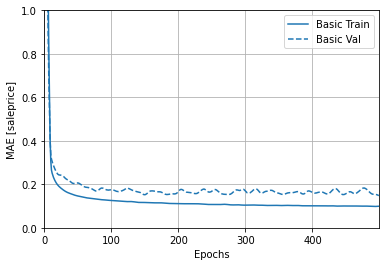

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [saleprice]')

Text(0, 0.5, 'MSE [saleprice^2]')

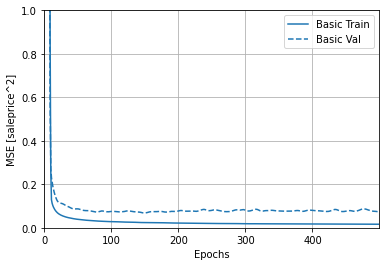

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1])
plt.ylabel('MSE [saleprice^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:115.9635,  mae:10.7500,  mse:116.1800,  val_loss:96.9469,  val_mae:9.7988,  val_mse:96.3559,  
....................................................................................................
Epoch: 100, loss:0.0244,  mae:0.1146,  mse:0.0244,  val_loss:0.0591,  val_mae:0.1645,  val_mse:0.0621,  
....................................................................................................
Epoch: 200, loss:0.0193,  mae:0.1041,  mse:0.0193,  val_loss:0.0549,  val_mae:0.1555,  val_mse:0.0552,  
......................................................................................

In [0]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,115.963470,10.750045,116.180023,96.946938,9.798836,96.355927,0
1,75.571381,8.659391,75.817894,54.576843,7.313852,53.958050,1
2,33.680042,5.708174,33.913834,16.616581,3.945248,16.233511,2
3,6.217303,2.204798,6.287294,1.243291,0.819513,1.198555,3
4,0.523319,0.563397,0.523849,0.522300,0.526453,0.525710,4
...,...,...,...,...,...,...,...
281,0.016933,0.095730,0.016996,0.046820,0.139668,0.048294,281
282,0.017338,0.096327,0.016916,0.063304,0.194706,0.066626,282
283,0.016316,0.097314,0.016408,0.059380,0.179524,0.063279,283
284,0.017302,0.099310,0.017279,0.053471,0.160609,0.054949,284


Text(0, 0.5, 'MAE [saleprice]')

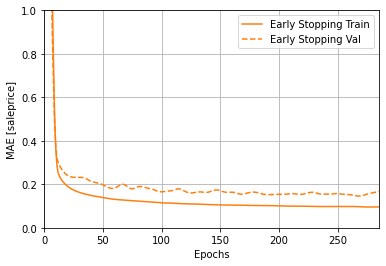

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [saleprice]')

Text(0, 0.5, 'MSE [saleprice]')

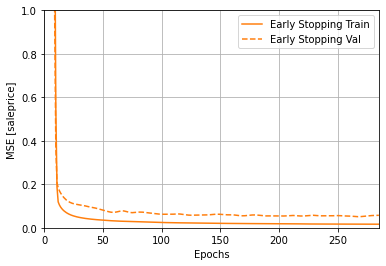

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([0, 1])
plt.ylabel('MSE [saleprice]')

In [0]:
prediction = model.predict(X_test).flatten()
predicted_df = pd.DataFrame({"Id": test_ids_df.test_id, "SalePrice": np.exp(prediction)})
predicted_df.head()

,Id,SalePrice
0,1461,156727.375000
1,1462,119226.437500
2,1463,221433.062500
3,1464,220473.453125
4,1465,224054.140625


In [0]:
predicted_df.to_csv("nn_submission_200426_1838.csv", index=False)

In [0]:
files.download('nn_submission_200426_1838.csv')